<a href="https://colab.research.google.com/github/avi028/Counting-sort-Role-play/blob/main/681Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import time
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/assignment3_data - Sheet23.csv")
data.tail

In [ ]:
data['IO Bandwith Numeric'] = data['IO Bandwidth'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data['Memory Numeric'] = data['memory'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data['IO Size Numeric'] = data['iosize'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data['Thread Memory Numeric'] = data['threadMemory'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data = data.drop('IO Bandwidth', axis=1)
data = data.drop('memory', axis=1)
data = data.drop('iosize', axis=1)
data = data.drop('threadMemory', axis=1)
data[['Rd','Wr']] = data["Rd/Wr"].str.split("/",expand=True)
data = data.drop('Rd/Wr', axis=1)
data

In [ ]:
from sklearn import preprocessing
col_list = list(data.columns)
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled,columns=col_list)
data

In [46]:
col_list
#targets = ['Rd','Wr','Throughput','ResponseTime','NoOfOperations','IO Size Numeric','IO Bandwith Numeric','cpuCore']
targets = ['Rd','Wr','Throughput','ResponseTime','NoOfOperations']
yTarget = ['ResponseTime']
predictors = list(set(list(data.columns))-set(targets))
X = data[predictors].values
y = data[yTarget].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=22,shuffle=True)
print(X_train.shape); 

print(y_train.shape)

(1333, 8)
(1333, 1)


In [50]:
modal = MLPRegressor(hidden_layer_sizes=(20,20),activation="logistic" ,solver="adam",random_state=1, max_iter=100)
modal.fit(X_train,y_train.ravel())
y_pred = modal.predict(X_test)
print("The Mean Squared Error",())
print("The Mean Absolute Percentage Error", (mean_absolute_percentage_error(y_pred, y_test)))
print("The Median Absloute Error", (median_absolute_error(y_pred, y_test)))
print("90th Percentile values for Prediction Error" ,np.percentile(y_pred-y_test,90))

The Mean Absolute Percentage Error 0.9226508780881763
The Median Absloute Error 0.03238312647962846
90th Percentile values for Prediction Error 0.05210751376217163


In [87]:
modal = MLPRegressor(hidden_layer_sizes=(20,20),activation="logistic" ,solver="lbfgs",random_state=1, max_iter=100)
modal.fit(X_train,y_train.ravel())
y_pred = modal.predict(X_test)
print("The Mean Squared Error", (mean_squared_error(y_pred, y_test)))
print("The Mean Absolute Percentage Error", (mean_absolute_percentage_error(y_pred, y_test)))
print("The Median Absloute Error", (median_absolute_error(y_pred, y_test)))
print("90th Percentile values for Prediction Error" ,np.percentile(y_pred-y_test,90))

The Mean Squared Error 0.005313851207731179
The Mean Absolute Percentage Error 1.017907937855992
The Median Absloute Error 0.037602941445381725
90th Percentile values for Prediction Error 0.10220086138545811


The Mean Absolute Percentage Error 0.9226508780881763
The Median Absloute Error 0.03238312647962846
90th Percentile values for Prediction Error 0.05210751376217163


In [44]:
from sklearn.svm import SVR
modal2 = SVR(kernel = 'rbf')
modal2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [45]:
y_pred = modal2.predict(X_test)
print("The Mean Absolute Percentage Error", (mean_absolute_percentage_error(y_pred, y_test)))
print("The Median Absloute Error", (median_absolute_error(y_pred, y_test)))
print("90th Percentile values for Prediction Error" ,np.percentile(y_pred-y_test,90))

The Mean Absolute Percentage Error 1.2262288497791984
The Median Absloute Error 0.04548347767316649
90th Percentile values for Prediction Error 0.12077756410737467


In [80]:
print("Training time\tavtivation Function\tSolver")
for i in {'tanh','logistic','relu'}:
  for j in {'adam','lbfgs','sgd'}:
    modal = MLPRegressor(hidden_layer_sizes=(20,20),activation=i ,solver=j,random_state=1, max_iter=5000)
    start = time.time()
    score = cross_val_score(modal,X_train,y_train.ravel(),cv=5,scoring='neg_mean_squared_error')
    stop = time.time()
    print()
    print(f"{stop - start}s","\t",i,"\t",j,"\t",abs(score.mean()))

Training time	avtivation Function	Solver

1.0843663215637207s 	 tanh 	 sgd 	 0.015360278056892773

23.88743281364441s 	 tanh 	 lbfgs 	 0.018001698603743

0.5349063873291016s 	 tanh 	 adam 	 0.012739834343746776

0.2817113399505615s 	 logistic 	 sgd 	 0.014138829351026177

0.4428093433380127s 	 logistic 	 lbfgs 	 0.0114301240503964

0.3920259475708008s 	 logistic 	 adam 	 0.013769265669810007

0.7043111324310303s 	 relu 	 sgd 	 0.022790182505764093

11.192076683044434s 	 relu 	 lbfgs 	 0.016024809503694636

0.6324732303619385s 	 relu 	 adam 	 0.010877584094121318


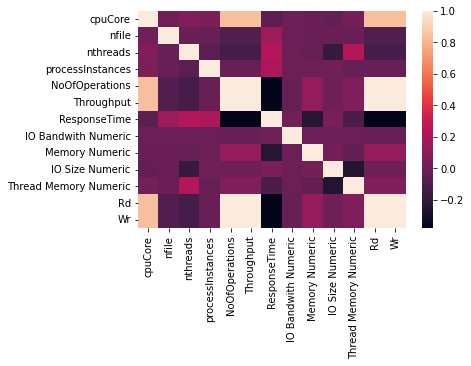

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)